In [16]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd    

In [17]:
data = pd.read_csv('Merged_file.csv')

C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3,4,9,10,14,15,19,20,21,23,28,29,30,32,33,34,36,41,42,45,46,48,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,80,81,85,86,87,88,90) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
data.columns

Index(['Unnamed: 0', 'Order ID', 'Order Status', 'Category Name', 'SKU',
       'Customization Group', 'Customization Option', 'Quantity', 'Unit Price',
       'Cost Price', 'Total Cost Price', 'Total Price', 'Order Total',
       'Sub Total', 'Tax', 'Delivery Charge', 'Tip', 'Discount',
       'Remaining Balance', 'Payment Method', 'Additional Charge',
       'Taxable Amount', 'Transaction ID', 'Currency Symbol',
       'Transaction Status', 'Promo Code', 'Customer ID', 'Merchant ID',
       'Store Name', 'Pickup Address', 'Description', 'Distance (in km)',
       'Order Time', 'Pickup Time', 'Delivery Time', 'Ratings', 'Reviews',
       'Merchant Earning', 'Commission Amount', 'Commission Payout Status',
       'Order Preparation Time', 'Redeemed Loyalty Points',
       'Consumed Loyalty Points', 'Cancellation Reason', 'Flat Discount',
       'Checkout Template Name', 'Checkout Template Value', 'Task_ID',
       'Order_ID', 'Relationship', 'Team_Name', 'Task_Type', 'Notes',
       'A

In [20]:
  #selecting required parameters in the columns
df = data[["Customer ID","Order ID", "Order Status","Distance (in km)",]]
df

,Customer ID,Order ID,Order Status,Distance (in km)
0,4645484.0,11262518.0,ORDERED,11996.01
1,4645484.0,11262518.0,ORDERED,11996.01
2,4420776.0,11261796.0,DISPATCHED,11994.38
3,4420776.0,11261796.0,DISPATCHED,11994.38
4,5156201.0,11261341.0,ORDERED,11998.28
...,...,...,...,...
71940,5188032.0,NaN,NaN,NaN
71941,5188161.0,NaN,NaN,NaN
71942,5188263.0,NaN,NaN,NaN
71943,5188431.0,NaN,NaN,NaN


In [22]:
df =df.fillna(1)
df

,Customer ID,Order ID,Order Status,Distance (in km)
0,4645484.0,11262518.0,ORDERED,11996.01
1,4645484.0,11262518.0,ORDERED,11996.01
2,4420776.0,11261796.0,DISPATCHED,11994.38
3,4420776.0,11261796.0,DISPATCHED,11994.38
4,5156201.0,11261341.0,ORDERED,11998.28
...,...,...,...,...
71940,5188032.0,1.0,1,1.00
71941,5188161.0,1.0,1,1.00
71942,5188263.0,1.0,1,1.00
71943,5188431.0,1.0,1,1.00


In [23]:
x = df.iloc[:, [0, 3]].values  


In [24]:
from sklearn.cluster import KMeans 

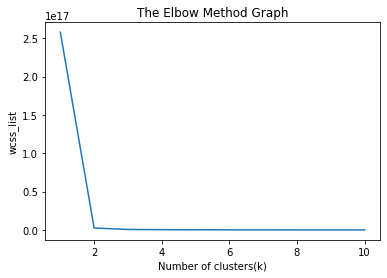

In [42]:
wcss_list=[]
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 1)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elbow Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

In [47]:
#training the K-means model on a dataset using 2 as the elbow point
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 1)  
y_predict= kmeans.fit_predict(x)  


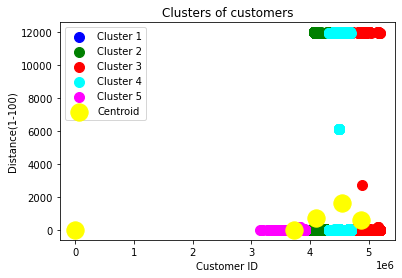

In [48]:
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of customers')  
mtp.xlabel('Customer ID')  
mtp.ylabel('Distance(1-100)')  
mtp.legend()  
mtp.show()  